In [30]:
import numpy as np
import pandas as pds
import os

import matplotlib as MP
from matplotlib import pyplot as plt
import seaborn as sbn

data = pds.read_csv(
    '../files/week06/Week 06. data-wine-red.csv',
    delimiter=';'
)

print(data.quality.value_counts())
data.quality -= 3

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
from itertools import product
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier as KNC

def ss_kfold_fn(data, scaling = True):
    kf = StratifiedKFold()
    for n, (train_idx, valid_idx) in enumerate(kf.split(data, data.quality)):
        
        scaler_x = StandardScaler()
        
        if scaling:
            train_x = scaler_x.fit_transform(data.iloc[train_idx].drop(columns = 'quality'))
            valid_x = scaler_x.transform(data.iloc[valid_idx].drop(columns = 'quality'))
            
        else:
            train_x = data.iloc[train_idx].drop(columns = 'quality').values
            valid_x = data.iloc[valid_idx].drop(columns = 'quality').values

        train_y = data.iloc[train_idx]['quality'].values.reshape(-1,1)
        valid_y = data.iloc[valid_idx]['quality'].values.reshape(-1,1)
        
        yield [
            [train_x, train_y],
            [valid_x, valid_y]
        ], (scaler_x)

In [33]:
X = data.drop(['quality'], axis = 1)
y = data['quality']

In [34]:
X.shape

(1599, 11)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

k = range(1,10,1)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNC(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.59375 Best K-Score 1


c:\Users\keb20\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\keb20\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\keb20\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\keb20\anacond

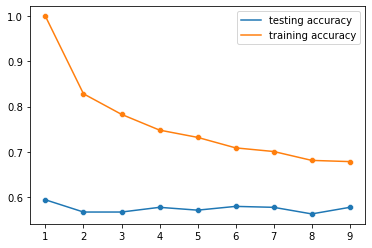

In [37]:
import seaborn as sns

sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])